In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spotipy
import json

In [2]:
from utility import get_spotify_client, get_spotify_oauth

In [3]:
%%capture
sp = get_spotify_oauth()

In [4]:
with open('similarity_ids.json', 'r') as f:
    json_obj = json.load(f)
my_id = json_obj['trystan']
their_id = json_obj['josiah']

In [5]:
def parse_track_json(track_id):
    track_data = sp.track(track_id)
    album_data = track_data['album']
    album_id = album_data['id']
    album_name = album_data['name']
    artists_data = track_data['artists']
    artists_names = [artist['name'] for artist in artists_data]
    artists_ids = [artist['id'] for artist in artists_data]
    return album_id, album_name, artists_names, artists_ids

In [6]:
def get_users_tracks_from_playlists(user_id, limit=15, offset=0):
    playlist_df = pd.DataFrame.from_records(sp.user_playlists(user_id, limit=limit, offset=offset)['items'])[['id', 'name', 'uri']]
    
    out_df = pd.concat([pd.DataFrame.from_records([jo['track'] for jo in sp.playlist_tracks(playlist_id)['items']])[['id', 'name', 'uri']] for playlist_id in playlist_df['id']], ignore_index=True)
    out_df[['album_id', 'album_name', 'artists_names', 'artists_ids']] = out_df[['id']].apply(lambda r: parse_track_json(r['id']), axis=1, result_type='expand')
    return out_df

In [7]:
# Good idea to make sure there's about the same number of tracks in each dataframe.
my_tracks_df = get_users_tracks_from_playlists(my_id, limit=40)
my_tracks_df

,id,name,uri,album_id,album_name,artists_names,artists_ids
0,6StYvRLBf8wZPng4WO6buh,Messy,spotify:track:6StYvRLBf8wZPng4WO6buh,18jdaKy8mRzEUDPpHJnpyw,Messy,[Conquer Divide],[4ZznAOb4aE3va5Jz1iDpjc]
1,6zdTpSc756yforxfthMKd2,My Future Ex Wife,spotify:track:6zdTpSc756yforxfthMKd2,0n8EieomN1TbzPvjVsxXVr,My Future Ex Wife,"[Andrés, Happy Hour]","[1kHRymNPmogG52AtyIJKQF, 6vNQcK5GY7IHShnGWsS3iD]"
2,7qJ0B5vtFGzXwQ6b18C9ri,Right Through Me,spotify:track:7qJ0B5vtFGzXwQ6b18C9ri,6Vptzgl2tL8XEBCHm1FsXR,Right Through Me,[The Home Team],[0hp58JplihFjlLstUbKS0x]
3,2pWjgVom86aF5F0JKAq4h0,Constance,spotify:track:2pWjgVom86aF5F0JKAq4h0,6thK8wh0CSXWd5ZaWURnFt,Constance (Acoustic),[Spiritbox],[4MzJMcHQBl9SIYSjwWn8QW]
4,0VwhP56nyBybH9WhLhMPrG,Mr. Magic,spotify:track:0VwhP56nyBybH9WhLhMPrG,0YyqEjOMn7E0hhSgIrhl1A,Mr. Magic,[Reliqa],[1R9eQdiIWCTdMAeIMA3oLK]
...,...,...,...,...,...,...,...
981,6PbUDvtc6Oom5pRbPnxKz2,Crystal Tokyo,spotify:track:6PbUDvtc6Oom5pRbPnxKz2,3UqtrI73uajshR3MJKuGWg,Crystal Tokyo,"[FantomenK, meganeko]","[2H11tig8QJ8eV3D04ocjQv, 5tXUIbGjW1uqXoy8cPW8MB]"
982,56oi3AuCS4WEv4RuGDE0Uy,Delete - Bossfight Remix,spotify:track:56oi3AuCS4WEv4RuGDE0Uy,1nG0yRqQSrEmvOvf3whYr5,Delete - Bossfight Remix,"[meganeko, Bossfight]","[5tXUIbGjW1uqXoy8cPW8MB, 1fILrc9B34DjHxSMkJmyBN]"
983,4KwOmxzcf2zcFUmgo6CBTR,she speaks,spotify:track:4KwOmxzcf2zcFUmgo6CBTR,4RsQZZ9ar6z3LRFwuJMuOy,Robot Language,[meganeko],[5tXUIbGjW1uqXoy8cPW8MB]
984,1ODEuo1QE9alDUNPOEcUBi,Velocity,spotify:track:1ODEuo1QE9alDUNPOEcUBi,76287k7E70rZ8hjgOVj8WJ,Nascens,[meganeko],[5tXUIbGjW1uqXoy8cPW8MB]


In [8]:
their_tracks_df = get_users_tracks_from_playlists(their_id, limit=32)
their_tracks_df

,id,name,uri,album_id,album_name,artists_names,artists_ids
0,6pooRNiLyYpxZeIA5kJ5EX,Good Things Fall Apart (with Jon Bellion),spotify:track:6pooRNiLyYpxZeIA5kJ5EX,4IYvXJnU8zPRzPPTu4dJUl,Good Things Fall Apart (with Jon Bellion),"[ILLENIUM, Jon Bellion]","[45eNHdiiabvmbp4erw26rg, 50JJSqHUf2RQ9xsHs0KMHg]"
1,2Qp4AzHWghlRC2VAWmzgHB,Green Eyes,spotify:track:2Qp4AzHWghlRC2VAWmzgHB,7vLmY8rLjLvOTQ0wk7Hqeh,Folk Hop N' Roll (Deluxe),[Judah & the Lion],[3wWtfT7S2uVJJ3hGZlOLkZ]
2,169pWCmfvVazzcL4EXFPgL,You Know It,spotify:track:169pWCmfvVazzcL4EXFPgL,5vBnIcG7nD3XEt8ErHpytO,Only The Lonely,[Colony House],[6R664N4cEza3eORSqKSgO4]
3,0yLbdeni9HurhZJOyvmD13,I Want It All,spotify:track:0yLbdeni9HurhZJOyvmD13,5vBnIcG7nD3XEt8ErHpytO,Only The Lonely,[Colony House],[6R664N4cEza3eORSqKSgO4]
4,5eebwQwrOQN5rZgR05HGef,Mason-Dixon Line,spotify:track:5eebwQwrOQN5rZgR05HGef,2dTMy6z2ynVzgy9s12aktg,Kids These Days,[Judah & the Lion],[3wWtfT7S2uVJJ3hGZlOLkZ]
...,...,...,...,...,...,...,...
1087,7KjmxWkC15gNyeUskvp1fv,What Child Is This,spotify:track:7KjmxWkC15gNyeUskvp1fv,1TzI5wwnlBtglKMxIW0Bx7,Christmas,[Phil Wickham],[5d1JhBfyb58upMXCZOdbQu]
1088,2WsfrJof0Hh9fz0ZxTC2Ey,Silent Night,spotify:track:2WsfrJof0Hh9fz0ZxTC2Ey,47KGGJrL31NSbqcfHN3gmJ,Silent Night,[NEEDTOBREATHE],[610EjgFatGvVPtib97jQ8G]
1089,1B4B033tgLq9ifm2st6djz,Peace on Earth,spotify:track:1B4B033tgLq9ifm2st6djz,4JhcMt55ccpnkHJTYyHMWj,Peace on Earth,[The National Parks],[2JMtxA2S9SNUlqBlkDtXm6]
1090,3ak66id2FyW67R6eB1nxfY,Pass Me A Pint,spotify:track:3ak66id2FyW67R6eB1nxfY,45f7eOwmTfcRStKkJHan16,Pass Me A Pint / Little Drummer Boy,[Johnnyswim],[4igDSX1kgfWbVTDCywcBGm]


In [9]:
min_size = min(my_tracks_df.shape[0], their_tracks_df.shape[0])
my_tracks_df = my_tracks_df[:min_size]
their_tracks_df = their_tracks_df[:min_size]
min_size

986

In [10]:
def get_recommendations(tracks_df: pd.DataFrame):
    most_common_tracks = [t[0] for t in tracks_df.value_counts(subset=['id']).index.tolist()[:5]]
    out_df = pd.DataFrame.from_records(sp.recommendations(country='US', seed_tracks=most_common_tracks)['tracks'])[['id', 'name', 'uri']]
    out_df[['album_id', 'album_name', 'artists_names', 'artists_ids']] = out_df.apply(lambda r: parse_track_json(r['id']), axis=1, result_type='expand')
    return out_df

In [11]:
my_recommendations_df = get_recommendations(my_tracks_df).apply(pd.Series.explode)
my_recommendations_df

,id,name,uri,album_id,album_name,artists_names,artists_ids
0,1QkEUbGSlp70DYNFcxcxYI,veil,spotify:track:1QkEUbGSlp70DYNFcxcxYI,3CzcEHy5nGbKPkA56ssTwd,Billow,須田景凪,5dWE3G7COO82G6vRy2Hpum
1,4nY1GIfdRWhPh9RBSCXsNW,Snow,spotify:track:4nY1GIfdRWhPh9RBSCXsNW,13Q4UGKTAXEDbIFfoJpsyj,Die on My Ride,Tengger Cavalry,1jH1BbeNbZBvIgDwxGIJhe
2,099L0yzX4UHJip4WwfxluS,High Steppin',spotify:track:099L0yzX4UHJip4WwfxluS,0TlxSUyEa0YzcLrnXfqasZ,Closer Than Together,The Avett Brothers,196lKsA13K3keVXMDFK66q
3,2ptvMNky2NB76kLNmjBVL3,Hollow Bodies,spotify:track:2ptvMNky2NB76kLNmjBVL3,0DwhxjTcmausDipXTYIqNp,Hollow Bodies,blessthefall,7t2C8WwLyKUKRe0LVh8zl9
4,2rzE0U87L1BvmbZ3mFxpFc,(I Just) Died in Your Arms,spotify:track:2rzE0U87L1BvmbZ3mFxpFc,0VOFSwSRePZwmf0xKniVxo,What Doesn't Kill Us,Throw The Fight,1nRfyHvAh1foLjOCa3hbv7
5,4h4vc7I2fajAKLG7os2Klq,Aoitoge,spotify:track:4h4vc7I2fajAKLG7os2Klq,7x6VFsg9C0oqfiv70xV3yl,SHIAWASE NA OTONA,Yoh kamiyama,3sIalaTfShc1biZjHCCVkv
6,0gqp35lTH7mS2B6JDjYAdo,Can't Rock My Dream Face,spotify:track:0gqp35lTH7mS2B6JDjYAdo,5GHLXH6qgXR4Gq10bmFfEo,ZONKEY,Umphrey's McGee,7mQilAy42MqNPqUFqK4Z0o
7,42EQCjMT4vvNN1Yov6rYX3,左手指月 (電視劇《香蜜沉沉燼如霜》片尾曲),spotify:track:42EQCjMT4vvNN1Yov6rYX3,5QRPdC8KRKSCfnfOqIIbcN,左手指月 (電視劇《香蜜沉沉燼如霜》片尾曲),Sa Dingding,5HCoNna7Jrw9YGVvo4lg1a
8,6ZfTIN0gmZft7Ewe9gjOyR,SAVAGES,spotify:track:6ZfTIN0gmZft7Ewe9gjOyR,3DVjLNjzyZBVc8eZcJoulz,The Silver Scream,Ice Nine Kills,52qKfVcIV4GS8A8Vay2xtt
9,3pQ0zUFOi4e1KZ8yQkeD42,インフェルノ,spotify:track:3pQ0zUFOi4e1KZ8yQkeD42,1thARtVFQruymTEXJBOVcP,インフェルノ,9mm Parabellum Bullet,3v0nHmnUcf9GAhjQOTctQu


In [12]:
their_recommendations_df = get_recommendations(their_tracks_df).apply(pd.Series.explode)
their_recommendations_df

,id,name,uri,album_id,album_name,artists_names,artists_ids
0,5kGBSOrKYmhRfdPBw4xD8D,Angela (Single Version),spotify:track:5kGBSOrKYmhRfdPBw4xD8D,5WQjTqCdzCAFQFVsMoUXm0,Angela (Single Version),The Lumineers,16oZKvXb6WkQlVAjwo2Wbg
1,6P7PgRkTCUAt2n4Lzv5pLN,Behind the Clouds,spotify:track:6P7PgRkTCUAt2n4Lzv5pLN,3Xiz5kq12VOzTw9Kun7m0f,Cars (Original Motion Picture Soundtrack),Brad Paisley,13YmWQJFwgZrd4bf5IjMY4
2,7Hn0bZgca6QFz6OyKkvAi6,Sometime Around Midnight,spotify:track:7Hn0bZgca6QFz6OyKkvAi6,4zz8xBoQ8KxRXnP5IeDJJ2,The Airborne Toxic Event (Deluxe Edition),The Airborne Toxic Event,7xovAENFxmyEWhzbnHsB3Z
3,6QZ8h3RqIgTRTo3hfaqryx,Black Butterflies and Déjà Vu,spotify:track:6QZ8h3RqIgTRTo3hfaqryx,2jStuYeaRty1cwxjoxfo9K,Lovely Little Lonely,The Maine,4o0pNHbyj36LPvukNqEug0
4,4DdF1l0DzBQy8YL2UVhPrU,Vacation,spotify:track:4DdF1l0DzBQy8YL2UVhPrU,4ykbJPI8MPscFzROE8dqLy,Tangled Up,Thomas Rhett,6x2LnllRG5uGarZMsD4iO8
5,185QRPHLcApZGgThcq5m8O,Mrs. Hippopotamuses',spotify:track:185QRPHLcApZGgThcq5m8O,1Eu5hjxGZVpyH3JSRoU5yi,Air for Free,Relient K,3nJWBJvK7uGvfp4iZh9CkN
6,4Pn0JlCUusD2QHjADuOzuV,Humble And Kind,spotify:track:4Pn0JlCUusD2QHjADuOzuV,4js8lX2b3DBIfixMCPABC4,Damn Country Music,Tim McGraw,6roFdX1y5BYSbp60OTJWMd
7,7LqYqe7uhDc1pw9urRoGq6,This Was a Home Once,spotify:track:7LqYqe7uhDc1pw9urRoGq6,2WCvNUmIjKAYq2jAnfmy2y,This Was a Home Once,Bad Suns,0YhUSm86okLWldQVwJkLlP
8,3MifGGbVXKQN7D1411JgOi,Never Gonna Let You Go,spotify:track:3MifGGbVXKQN7D1411JgOi,7wckKJKA0dkJl5TxNeqgBB,Something Like This,Ben Rector,4AapPt7H6bGH4i7chTulpI
9,36ISlLb12gKuCCVTYXC0gb,Beers And Sunshine,spotify:track:36ISlLb12gKuCCVTYXC0gb,1GZyb1fAcVAdxeZK16ozLR,Beers And Sunshine,Darius Rucker,7FY5V3XMwlNBPitEjXowHQ


In [13]:
def parse_features(track_id):
    features = sp.audio_features(track_id)[0]
    return features['loudness'], features['speechiness'], features['acousticness'], features['instrumentalness'], features['liveness'], features['valence'], features['tempo']

In [14]:
my_tracks_df[['loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']] = my_tracks_df[['id']].apply(lambda row: parse_features(row['id']), axis=1, result_type='expand')
my_tracks_df

/home/duke_trystan/miniconda3/envs/Spotify-Listening-Analysis/lib/python3.9/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,id,name,uri,album_id,album_name,artists_names,artists_ids,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,6StYvRLBf8wZPng4WO6buh,Messy,spotify:track:6StYvRLBf8wZPng4WO6buh,18jdaKy8mRzEUDPpHJnpyw,Messy,[Conquer Divide],[4ZznAOb4aE3va5Jz1iDpjc],-6.341,0.0504,0.005460,0.000053,0.4730,0.480,155.023
1,6zdTpSc756yforxfthMKd2,My Future Ex Wife,spotify:track:6zdTpSc756yforxfthMKd2,0n8EieomN1TbzPvjVsxXVr,My Future Ex Wife,"[Andrés, Happy Hour]","[1kHRymNPmogG52AtyIJKQF, 6vNQcK5GY7IHShnGWsS3iD]",-4.386,0.0339,0.540000,0.000002,0.0907,0.842,144.985
2,7qJ0B5vtFGzXwQ6b18C9ri,Right Through Me,spotify:track:7qJ0B5vtFGzXwQ6b18C9ri,6Vptzgl2tL8XEBCHm1FsXR,Right Through Me,[The Home Team],[0hp58JplihFjlLstUbKS0x],-5.001,0.1970,0.026800,0.000002,0.2100,0.675,128.035
3,2pWjgVom86aF5F0JKAq4h0,Constance,spotify:track:2pWjgVom86aF5F0JKAq4h0,6thK8wh0CSXWd5ZaWURnFt,Constance (Acoustic),[Spiritbox],[4MzJMcHQBl9SIYSjwWn8QW],-7.670,0.0459,0.003440,0.129000,0.2110,0.132,112.255
4,0VwhP56nyBybH9WhLhMPrG,Mr. Magic,spotify:track:0VwhP56nyBybH9WhLhMPrG,0YyqEjOMn7E0hhSgIrhl1A,Mr. Magic,[Reliqa],[1R9eQdiIWCTdMAeIMA3oLK],-3.492,0.0775,0.000855,0.005370,0.0907,0.332,200.012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,6PbUDvtc6Oom5pRbPnxKz2,Crystal Tokyo,spotify:track:6PbUDvtc6Oom5pRbPnxKz2,3UqtrI73uajshR3MJKuGWg,Crystal Tokyo,"[FantomenK, meganeko]","[2H11tig8QJ8eV3D04ocjQv, 5tXUIbGjW1uqXoy8cPW8MB]",-7.184,0.0463,0.000761,0.899000,0.3210,0.398,173.983
982,56oi3AuCS4WEv4RuGDE0Uy,Delete - Bossfight Remix,spotify:track:56oi3AuCS4WEv4RuGDE0Uy,1nG0yRqQSrEmvOvf3whYr5,Delete - Bossfight Remix,"[meganeko, Bossfight]","[5tXUIbGjW1uqXoy8cPW8MB, 1fILrc9B34DjHxSMkJmyBN]",-5.219,0.0596,0.000154,0.844000,0.0949,0.355,174.020
983,4KwOmxzcf2zcFUmgo6CBTR,she speaks,spotify:track:4KwOmxzcf2zcFUmgo6CBTR,4RsQZZ9ar6z3LRFwuJMuOy,Robot Language,[meganeko],[5tXUIbGjW1uqXoy8cPW8MB],-12.866,0.0654,0.026100,0.026400,0.3180,0.911,105.002
984,1ODEuo1QE9alDUNPOEcUBi,Velocity,spotify:track:1ODEuo1QE9alDUNPOEcUBi,76287k7E70rZ8hjgOVj8WJ,Nascens,[meganeko],[5tXUIbGjW1uqXoy8cPW8MB],-5.921,0.1900,0.002280,0.316000,0.1030,0.441,173.931


In [15]:
their_tracks_df[['loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']] = their_tracks_df[['id']].apply(lambda row: parse_features(row['id']), axis=1, result_type='expand')
their_tracks_df

/home/duke_trystan/miniconda3/envs/Spotify-Listening-Analysis/lib/python3.9/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,id,name,uri,album_id,album_name,artists_names,artists_ids,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,6pooRNiLyYpxZeIA5kJ5EX,Good Things Fall Apart (with Jon Bellion),spotify:track:6pooRNiLyYpxZeIA5kJ5EX,4IYvXJnU8zPRzPPTu4dJUl,Good Things Fall Apart (with Jon Bellion),"[ILLENIUM, Jon Bellion]","[45eNHdiiabvmbp4erw26rg, 50JJSqHUf2RQ9xsHs0KMHg]",-5.453,0.0318,0.012800,0.000000,0.1180,0.442,144.033
1,2Qp4AzHWghlRC2VAWmzgHB,Green Eyes,spotify:track:2Qp4AzHWghlRC2VAWmzgHB,7vLmY8rLjLvOTQ0wk7Hqeh,Folk Hop N' Roll (Deluxe),[Judah & the Lion],[3wWtfT7S2uVJJ3hGZlOLkZ],-7.040,0.0331,0.000026,0.127000,0.1100,0.422,143.989
2,169pWCmfvVazzcL4EXFPgL,You Know It,spotify:track:169pWCmfvVazzcL4EXFPgL,5vBnIcG7nD3XEt8ErHpytO,Only The Lonely,[Colony House],[6R664N4cEza3eORSqKSgO4],-2.901,0.0978,0.035200,0.000000,0.1460,0.572,158.121
3,0yLbdeni9HurhZJOyvmD13,I Want It All,spotify:track:0yLbdeni9HurhZJOyvmD13,5vBnIcG7nD3XEt8ErHpytO,Only The Lonely,[Colony House],[6R664N4cEza3eORSqKSgO4],-4.851,0.0655,0.020900,0.000065,0.0611,0.647,139.018
4,5eebwQwrOQN5rZgR05HGef,Mason-Dixon Line,spotify:track:5eebwQwrOQN5rZgR05HGef,2dTMy6z2ynVzgy9s12aktg,Kids These Days,[Judah & the Lion],[3wWtfT7S2uVJJ3hGZlOLkZ],-7.167,0.0316,0.012200,0.000211,0.3710,0.607,98.288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,0y1QJc3SJVPKJ1OvFmFqe6,Way down We Go,spotify:track:0y1QJc3SJVPKJ1OvFmFqe6,4he4SQup02hEIQdwhZlZlk,A/B,[KALEO],[7jdFEYD2LTYjfwxOdlVjmc],-8.022,0.1170,0.579000,0.000333,0.1040,0.337,163.255
982,6PCUP3dWmTjcTtXY02oFdT,Castle on the Hill,spotify:track:6PCUP3dWmTjcTtXY02oFdT,3T4tUhGYeRNVUGevb0wThu,÷ (Deluxe),[Ed Sheeran],[6eUKZXaKkcviH0Ku9w2n3V],-4.868,0.0989,0.023200,0.000011,0.1400,0.471,135.007
983,0afhq8XCExXpqazXczTSve,Galway Girl,spotify:track:0afhq8XCExXpqazXczTSve,3T4tUhGYeRNVUGevb0wThu,÷ (Deluxe),[Ed Sheeran],[6eUKZXaKkcviH0Ku9w2n3V],-3.374,0.1000,0.073500,0.000000,0.3270,0.781,99.943
984,35QZaWQRkmnAVqBF1TLCxQ,Nancy Mulligan,spotify:track:35QZaWQRkmnAVqBF1TLCxQ,3T4tUhGYeRNVUGevb0wThu,÷ (Deluxe),[Ed Sheeran],[6eUKZXaKkcviH0Ku9w2n3V],-4.350,0.0349,0.117000,0.000000,0.0866,0.858,101.993


In [16]:
from itertools import chain

In [17]:
# I want to go from separate columns for each features
# to a key, value pair kind of for each track.
# Should probably have the track id be the index... maybe
def plot_track_features(df):
    df_1 = df[['loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].apply(lambda r: [{'key': 'loudness', 'value': r['loudness']}, {'key': 'speechiness', 'value': r['speechiness']}, {'key': 'valence', 'value': r['valence']}, {'key': 'liveness', 'value': r['liveness']}, {'key': 'acousticness', 'value': r['acousticness']}, {'key': 'instrumentalness', 'value': r['instrumentalness']}], axis=1, result_type='expand')
    features_kv_df = pd.DataFrame.from_records(list(chain.from_iterable(df_1.values.T.tolist())))
    sns.boxplot(data=features_kv_df[features_kv_df['key'] != 'loudness'], x='value', y='key', orient='h')

In [18]:
plt.rcParams['figure.facecolor'] = 'white'


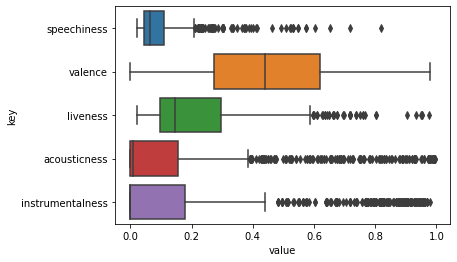

In [19]:
plot_track_features(my_tracks_df)

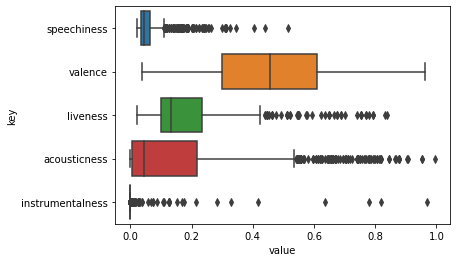

In [20]:
plot_track_features(their_tracks_df)

In [21]:
import scipy.stats as stats

In [22]:
def do_kendall_tau(my_df, their_df, columns):
    return {col: stats.kendalltau(my_df[col], their_df[col]).correlation for col in columns}

In [23]:
# Kendalltau basically measures how much each variable goes above the mean or less
# But is still basically a correlation metric.
do_kendall_tau(my_tracks_df, their_tracks_df, columns=['valence', 'speechiness', 'liveness', 'acousticness', 'instrumentalness'])

{'valence': 0.0176407964234591,
 'speechiness': 0.013851379281145007,
 'liveness': 0.011565029546631024,
 'acousticness': 0.10052732265412036,
 'instrumentalness': 0.017164146331257908}

In [24]:
my_tracks_df['owner'] = 'me'
their_tracks_df['owner'] = 'them'
merged_tracks_df = pd.concat([my_tracks_df, their_tracks_df], ignore_index=True)
merged_tracks_df

<ipython-input-24-d65e940b35f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_tracks_df['owner'] = 'me'
<ipython-input-24-d65e940b35f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  their_tracks_df['owner'] = 'them'


,id,name,uri,album_id,album_name,artists_names,artists_ids,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,owner
0,6StYvRLBf8wZPng4WO6buh,Messy,spotify:track:6StYvRLBf8wZPng4WO6buh,18jdaKy8mRzEUDPpHJnpyw,Messy,[Conquer Divide],[4ZznAOb4aE3va5Jz1iDpjc],-6.341,0.0504,0.005460,0.000053,0.4730,0.480,155.023,me
1,6zdTpSc756yforxfthMKd2,My Future Ex Wife,spotify:track:6zdTpSc756yforxfthMKd2,0n8EieomN1TbzPvjVsxXVr,My Future Ex Wife,"[Andrés, Happy Hour]","[1kHRymNPmogG52AtyIJKQF, 6vNQcK5GY7IHShnGWsS3iD]",-4.386,0.0339,0.540000,0.000002,0.0907,0.842,144.985,me
2,7qJ0B5vtFGzXwQ6b18C9ri,Right Through Me,spotify:track:7qJ0B5vtFGzXwQ6b18C9ri,6Vptzgl2tL8XEBCHm1FsXR,Right Through Me,[The Home Team],[0hp58JplihFjlLstUbKS0x],-5.001,0.1970,0.026800,0.000002,0.2100,0.675,128.035,me
3,2pWjgVom86aF5F0JKAq4h0,Constance,spotify:track:2pWjgVom86aF5F0JKAq4h0,6thK8wh0CSXWd5ZaWURnFt,Constance (Acoustic),[Spiritbox],[4MzJMcHQBl9SIYSjwWn8QW],-7.670,0.0459,0.003440,0.129000,0.2110,0.132,112.255,me
4,0VwhP56nyBybH9WhLhMPrG,Mr. Magic,spotify:track:0VwhP56nyBybH9WhLhMPrG,0YyqEjOMn7E0hhSgIrhl1A,Mr. Magic,[Reliqa],[1R9eQdiIWCTdMAeIMA3oLK],-3.492,0.0775,0.000855,0.005370,0.0907,0.332,200.012,me
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1967,0y1QJc3SJVPKJ1OvFmFqe6,Way down We Go,spotify:track:0y1QJc3SJVPKJ1OvFmFqe6,4he4SQup02hEIQdwhZlZlk,A/B,[KALEO],[7jdFEYD2LTYjfwxOdlVjmc],-8.022,0.1170,0.579000,0.000333,0.1040,0.337,163.255,them
1968,6PCUP3dWmTjcTtXY02oFdT,Castle on the Hill,spotify:track:6PCUP3dWmTjcTtXY02oFdT,3T4tUhGYeRNVUGevb0wThu,÷ (Deluxe),[Ed Sheeran],[6eUKZXaKkcviH0Ku9w2n3V],-4.868,0.0989,0.023200,0.000011,0.1400,0.471,135.007,them
1969,0afhq8XCExXpqazXczTSve,Galway Girl,spotify:track:0afhq8XCExXpqazXczTSve,3T4tUhGYeRNVUGevb0wThu,÷ (Deluxe),[Ed Sheeran],[6eUKZXaKkcviH0Ku9w2n3V],-3.374,0.1000,0.073500,0.000000,0.3270,0.781,99.943,them
1970,35QZaWQRkmnAVqBF1TLCxQ,Nancy Mulligan,spotify:track:35QZaWQRkmnAVqBF1TLCxQ,3T4tUhGYeRNVUGevb0wThu,÷ (Deluxe),[Ed Sheeran],[6eUKZXaKkcviH0Ku9w2n3V],-4.350,0.0349,0.117000,0.000000,0.0866,0.858,101.993,them


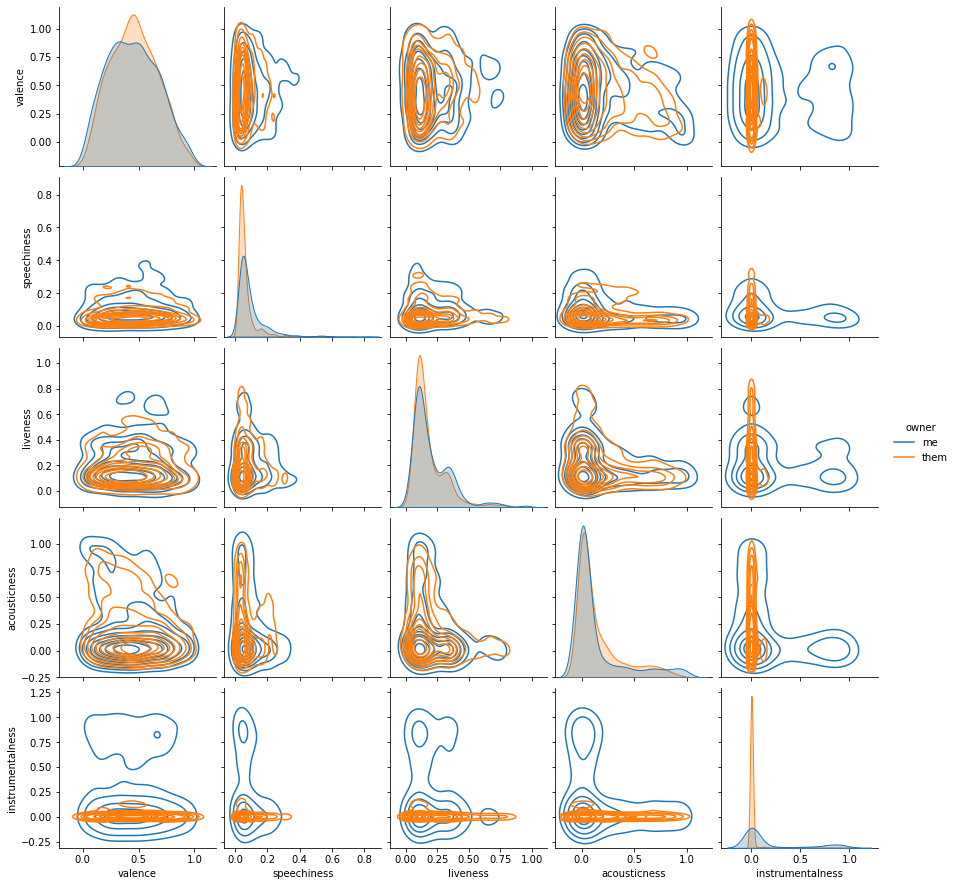

In [25]:
sns.pairplot(data=merged_tracks_df, kind='kde', vars=['valence', 'speechiness', 'liveness', 'acousticness', 'instrumentalness'], hue='owner')